In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import folium
from sklearn.metrics import confusion_matrix

In [2]:
# Load the dataset
data = pd.read_excel("us-violence-brief-1.xls")

In [3]:
data.head()

,year,month,day,latitude,longitude,fatalities
0,2020,1,27,38.8137,-76.9453,1
1,2020,1,28,40.0444,-111.7320,0
2,2020,1,31,30.3674,-89.0928,1
3,2020,2,1,33.9375,-117.2310,1
4,2020,2,4,35.0887,-92.4421,1


In [4]:
# Split the dataset into training (2020-2022) and testing (2023) data
train_data = data[data['year'] <= 2022]
test_data = data[data['year'] == 2023]

# Define the features and target variable
X_train = train_data[['year', 'month', 'day', 'latitude', 'longitude']]
y_train = train_data['fatalities']

X_test = test_data[['year', 'month', 'day', 'latitude', 'longitude']]
y_test = test_data['fatalities']

In [5]:
results = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'k': k,
        'value_counts': pd.Series(y_pred).value_counts().to_dict(),
        'accuracy': accuracy
    })
results_df = pd.DataFrame(results)
results_df

,k,value_counts,accuracy
0,1,"{0: 193, 1: 24}",0.806452
1,3,"{0: 207, 1: 10}",0.834101
2,5,"{0: 214, 1: 3}",0.838710
3,7,"{0: 215, 1: 2}",0.834101
4,9,{0: 217},0.834101
5,11,"{0: 215, 1: 2}",0.824885
6,13,{0: 217},0.834101
7,15,{0: 217},0.834101
8,17,{0: 217},0.834101
9,19,{0: 217},0.834101


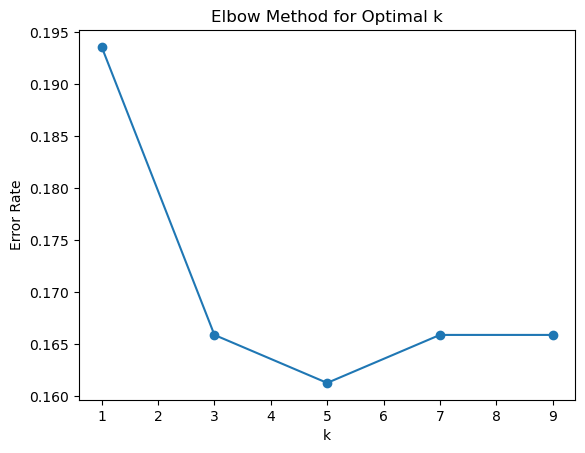

In [6]:
# Elbow Method to find optimal k
def calculate_error_rate(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return mean_squared_error(y_test, y_pred)

k_values = range(1, 10, 2)
error_rates = [calculate_error_rate(k) for k in k_values]

# Plot the elbow method with error rate
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal k')
plt.show()

In [7]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [8]:
pd.Series(y_pred).value_counts()

0    207
1     10
Name: count, dtype: int64

In [9]:
y_test.value_counts()

fatalities
0    181
1     36
Name: count, dtype: int64

In [10]:
accuracy

0.8341013824884793

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[176   5]
 [ 31   5]]


In [12]:
map = folium.Map(location=[test_data['latitude'].mean(), test_data['longitude'].mean()], zoom_start=5)
for _, row in test_data.iterrows():
    color = 'red' if row['fatalities'] == 1 else 'blue'
    folium.CircleMarker([row['latitude'], row['longitude']], color=color, radius=5).add_to(map)

map.save("folium_map.html")
map

In [13]:
map_pred = folium.Map(location=[test_data['latitude'].mean(), test_data['longitude'].mean()], zoom_start=5)
for idx, predicted_fatalities in enumerate(y_pred):
    # Get the latitude and longitude from the test data
    latitude = X_test.iloc[idx]['latitude']
    longitude = X_test.iloc[idx]['longitude']
    color = 'red' if predicted_fatalities == 1 else 'blue'
    folium.CircleMarker([latitude, longitude], color=color, radius=5).add_to(map_pred)
map_pred.save("folium_map_pred.html")
map_pred